In [1]:
import pandas as pd
import numpy as np
import requests
import json
import bs4
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup


# Homework 5



## Rest API


In [2]:
# adapted from https://nobelprize.readme.io/reference/prize
url = "http://api.nobelprize.org/v1/prize.json?year=1901&yearTo=2024&category=physics" 
headers = {"accept": "application/json"}
response = requests.get(url, headers=headers)

In [3]:
data_v1=response.json()

In [4]:
data_v1.keys()

dict_keys(['prizes'])

In [5]:
data_v1['prizes'][0]

{'year': '2024',
 'category': 'physics',
 'laureates': [{'id': '1037',
   'firstname': 'John',
   'surname': 'Hopfield',
   'motivation': '"for foundational discoveries and inventions that enable machine learning with artificial neural networks"',
   'share': '2'},
  {'id': '1038',
   'firstname': 'Geoffrey',
   'surname': 'Hinton',
   'motivation': '"for foundational discoveries and inventions that enable machine learning with artificial neural networks"',
   'share': '2'}]}

In [6]:
data_v1_df_II = pd.DataFrame(data_v1['prizes']) # create a DataFrame from the dict

In [7]:
data_v1_df_III = data_v1_df_II.set_index('year') # make year to index

In [8]:
data_v1_df_IV = data_v1_df_III['laureates'] # make a Series from the 'laureates' column

In [9]:
data_v1_df_IV[0:3]

year
2024    [{'id': '1037', 'firstname': 'John', 'surname'...
2023    [{'id': '1026', 'firstname': 'Pierre', 'surnam...
2022    [{'id': '1012', 'firstname': 'Alain', 'surname...
Name: laureates, dtype: object


##### We have a Series of lists of dicts. From each dict we want the value for tke key 'motivation'.


The Series is data_v1_df_IV, the lists are data_v1_df_IV.loc['year'] and the dicts are data_v1_df_IV.loc['year'][i]

To get the motivations, we can map a function on each list and then map another function on each dict in a list.

This is to get a string of words from the motivations for the word cloud.

In [10]:
def words_in_motivation(lexikon):
    '''
    lexikon is a dict, from which we get the value
    for the key 'motivation'. This value is
    transformed to a string of lower case
    words, which is then returned.
    '''
    value = lexikon['motivation']
    tokens = value.split()

    lower_case_words_in_motivation = ''
    for i in range(len(tokens)):
        lower_case_words_in_motivation += " " + tokens[i].lower() + " "

    return lower_case_words_in_motivation.replace('"', ' ') # remove unnecessary citation characters
    

In [11]:
def dicts_in_list(lista):
    '''
    lista is a list of dictionaries. For each dict in the list, the function
    words_in_motivation is called. The returned words from all dicts in the
    list are then concatenated and returned from this function.
    '''
    lower_case_words_in_list = ''
    
    for lexikon in lista:        
        lower_case_words_in_list += " " + words_in_motivation(lexikon) + " "

    return lower_case_words_in_list   
    


###### All motivations from 1901 to 2024 in one string


In [12]:
def concatenate_strings(series_of_strings):
    '''
    All strings in a Series of strings is concatenated
    to one string, which is returned.
    '''
    common_string = '' # string concatenated from all strings in series_of_strings
    
    for strang in series_of_strings:
        common_string += strang

    return common_string    


##### Word cloud


There are some missing values to handle.

In [13]:
data_v1_df_IV.iloc[81:86]

year
1943    [{'id': '48', 'firstname': 'Otto', 'surname': ...
1942                                                  NaN
1941                                                  NaN
1940                                                  NaN
1939    [{'id': '47', 'firstname': 'Ernest', 'surname'...
Name: laureates, dtype: object

In [14]:
data_v1_df_IV.iloc[89:95]

year
1935    [{'id': '41', 'firstname': 'James', 'surname':...
1934                                                  NaN
1933    [{'id': '39', 'firstname': 'Erwin', 'surname':...
1932    [{'id': '38', 'firstname': 'Werner', 'surname'...
1931                                                  NaN
1930    [{'id': '37', 'firstname': 'Sir Chandrasekhara...
Name: laureates, dtype: object

In [15]:
data_v1_df_IV.iloc[107:110]

year
1917    [{'id': '22', 'firstname': 'Charles Glover', '...
1916                                                  NaN
1915    [{'id': '20', 'firstname': 'William', 'surname...
Name: laureates, dtype: object

In [16]:
data_v1_df_V = data_v1_df_IV.dropna() # no prizes were awarded 1916, 1931, 1934, 1940-1942

In [17]:
transformation_list = data_v1_df_V.map(dicts_in_list) # creates a Series of strings

In [18]:
string_of_motivations = concatenate_strings(transformation_list) # the Series of strings is transformed to one string

The code below is adapted from https://www.geeksforgeeks.org/generating-word-cloud-python/

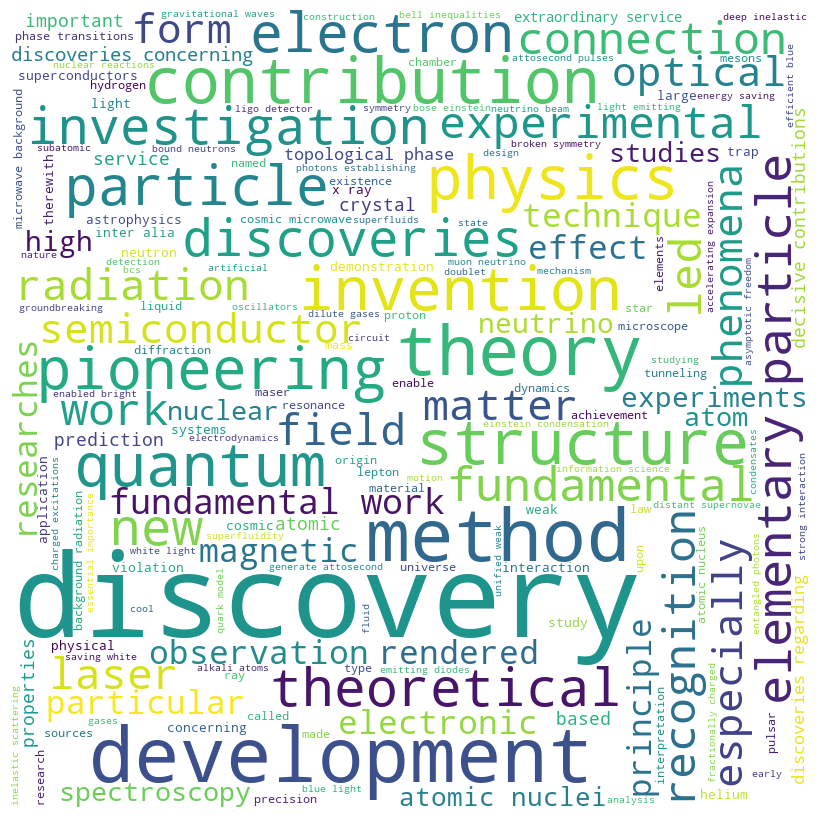

In [19]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(string_of_motivations)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


## Web Scraping



#### Books



#### Get content for 3 book pages


In [20]:
url_page_1 = "https://books.toscrape.com/catalogue/page-1.html"
url_page_2 = "https://books.toscrape.com/catalogue/page-2.html"
url_page_3 = "https://books.toscrape.com/catalogue/page-3.html"

response_1 = requests.get(url_page_1)
response_2 = requests.get(url_page_2) 
response_3 = requests.get(url_page_3) 
  
html_1 = BeautifulSoup(response_1.content) 
html_2 = BeautifulSoup(response_2.content) 
html_3 = BeautifulSoup(response_3.content) 


#### Relevant info for all books on three pages of 20 books each


In [21]:
articles = [] # list to hold articles on all 60 books

In [22]:
html_1_section = html_1.find('section')
html_2_section = html_2.find('section')
html_3_section = html_3.find('section')

In [23]:
for article in html_1_section.find_all("article"):
    articles.append(article)

for article in html_2_section.find_all("article"):
    articles.append(article)

for article in html_3_section.find_all("article"):
    articles.append(article)


##### Find facts about the first book


In [24]:
articles[0].contents[3]['class'][1] # rating for the first book

'Three'

In [25]:
common_book_url = "https://books.toscrape.com/catalogue/" # common part of the url for all books

In [26]:
specific_book_url = articles[0].contents[5].contents[0]['href'] # specific part of the url for the first book

In [27]:
full_book_url = common_book_url + specific_book_url
full_book_url

'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [28]:
response_book = requests.get(full_book_url)  
html_book = BeautifulSoup(response_book.content)

book_table = html_book.find("table")

upc = book_table.contents[1].contents[2].text
upc # upc of the first book

'a897fe39b1053632'

In [29]:
articles[0].contents[5].contents[0]['title'] # title of the first book

'A Light in the Attic'

In [30]:
articles[0].contents[7].contents[1].text # price of the first book

'£51.77'


#### Get info for all 60 books and store in data frame


In [31]:
def get_upc(url_book):    
    '''
    Function that gets an url for the page for a specific book.
    From this page it retrieves the upc, which is then returned.    
    '''
    response_book = requests.get(url_book)   
    html_book = BeautifulSoup(response_book.content)
    book_table = html_book.find("table")

    return book_table.contents[1].contents[2].text # upc

In [32]:
columns = ['upc', 'title', 'price', 'rating'] # column headers for the data frame
data = []

In [33]:
for i in range(60):
    book_url = common_book_url + articles[i].contents[5].contents[0]['href'] # book page
    data.append([ get_upc(book_url),                            # upc
                  articles[i].contents[5].contents[0]['title'], # title
                  articles[i].contents[7].contents[1].text,     # price
                  articles[i].contents[3]['class'][1] ])        # rating

In [34]:
books_df = pd.DataFrame(data, columns=columns) # create data frame for all books
head_books_df = books_df.iloc[0:5,:].copy()    # first five rows in data frame, to style for assignment requirements

In [35]:
styled_head_books = head_books_df.style
# remove row numbers
styled_head_books.hide() 
# no bold header text, left justify column headers
styled_head_books.apply_index(lambda s: np.where(s.isin(["upc", "title", "price", "rating"]), "font-weight:normal; text-align:left;", ""), axis=1)
# left justify data
styled_head_books.set_properties(**{"text-align":"left"}) 

upc,title,price,rating
a897fe39b1053632,A Light in the Attic,£51.77,Three
90fa61229261140a,Tipping the Velvet,£53.74,One
6957f44c3847a760,Soumission,£50.10,One
e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
